# Introduction to Image Processing

Mojdeh Rastgoo - Desire Sidibe

## 1. Introduction to scikit-image

The modules which are commonly used are entered in the following cell.

In [1]:
%matplotlib inline
%pprint off

# Matplotlib library
import matplotlib.pyplot as plt
from matplotlib import cm

# Numpy library
import numpy as np

Pretty printing has been turned OFF


### 1.1 Image in skimage

The first step of this practise is to learn the procedure to deal with image in `python`.

In this regard, you will need to refer to two main modules of *skimage*. The first module will give all information about [input-output](http://scikit-image.org/docs/dev/api/skimage.io.html) in order to read, write, and show image. The second module is as important and refers to the [utility functions](http://scikit-image.org/docs/stable/api/skimage.html) which allow you to know what is the data type of the images.

#### IO module

In this part, you will rely on the module **io** of the `skimage`. This module can be imported as:

In [2]:
from skimage import io

Now, any function of this module can be called by `io.name_of_the_function`. See the following [webpage](http://scikit-image.org/docs/dev/api/skimage.io.html) to know all the functions available and the arguments of each of them.

##### imread() and imshow()

We will first play with the functions `io.imread()` and `io.imshow()` in order to read and show images. Refer to the documentation to know about the input and output arguments associated with this function. 

** Q.1 Read the grayscale image called `lena-grey.bmp` and show the output.**

** Q.2 Display the shape and data type of the image **
Refer to function [`shape()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html) and [`dtype()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.dtype.html) from the `numpy` library.

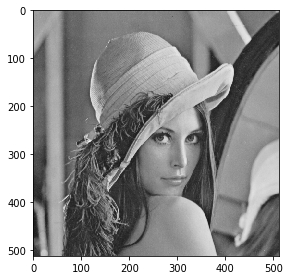

In [3]:
img_path='./images/'
img_name='lena-grey.bmp'
lena_img=io.imread(img_path.__add__(img_name))
io.imshow(lena_img)

In [4]:
print(lena_img.shape)
print(lena_img.dtype)

(512, 512)
uint8


The `io.imshow()` function is provided by the `skimage` library. However, it is interesting to know that this function is herited from the very well known `matplotlib` library. This library has been imported in the preamble of this document and can be called with the prefix `plt`. For instance, we can show an image using:
```
plt.imshow(image_name)

```

** Q.3 Show the lena-grey image using matplotlib library.**

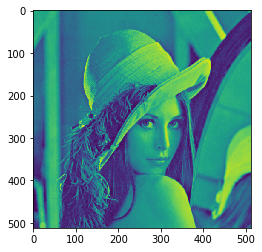

In [5]:
plt.imshow(lena_img)

You can see that this image is displayed with false color. Each gray level is replaced by a given color. This mapping is known as `colormap`. To obtain similar results than in `skimage`, we need to apply a grey colormap. 

```
   plt.imshow(..., cmap = cm.Greys_r)
```

More information about colormap can be found [here](http://matplotlib.org/examples/color/colormaps_reference.html).

**Q.4 Display the image using matplotlib.pyplot library in grey**



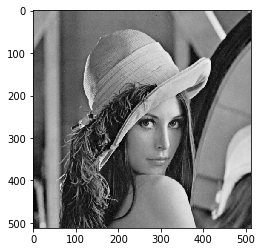

In [6]:
plt.imshow(lena_img,cmap = cm.gray)

** Q.5 Repeat the same manipulation using color image `vibot-color.jpg` **

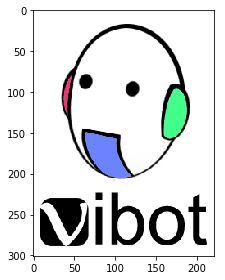

In [7]:
img_path='./images/'
img_name='vibot-color.jpg'
vibot_img=io.imread(img_path.__add__(img_name))
io.imshow(vibot_img)

** Q.6 Check the documentation of the function `imread` from skimage and open the previous color image as a grey scale image.**

In [8]:
I = io.imread(img_path.__add__(img_name),as_grey=True)
I2 =  io.imread(img_path.__add__(img_name),as_grey=False)
print(I2.shape)
print(I2.dtype)
print(I)
print(I.shape)
print(I.dtype)
print(I.max())

(301, 222, 3)
uint8
[[ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 ..., 
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]]
(301, 222)
float64
1.0


Observe attentively the change of the data type.

### 1.2 Data type

It is important to understand which type of data do you obtain once the image is loaded. Subsequent algorithms will require a certain type (*ie.*, float, unsigned int) included in a certain data range. That is why, you need to refer to the [utility functions](http://scikit-image.org/docs/stable/api/skimage.html) in order to perform the right conversion between types.

** Q.7 Re-open the data from the grey-scale image `lena-grey.bmp` and print the matrix and the type which have been loaded by default.**

In [9]:
img_name2='lena-grey.bmp'
lena = io.imread(img_path.__add__(img_name2),as_grey=True)
#print(Lena)

A set of functions allow to make automatic conversion between type and range and can be called as `img_as_type()`. 

Usually, algorithms expect images as float type in the range [0.0, 1.0]. However, the previous data were coded with 8-bits unsigned integer. 

**Q.8 Convert the data into float included in the range [0.0, 1.0].**

In [10]:
from skimage import img_as_float
lena_float = img_as_float(lena)
print(lena_float)

[[ 0.63529412  0.63529412  0.63529412 ...,  0.66666667  0.60784314
   0.50196078]
 [ 0.63529412  0.63529412  0.63529412 ...,  0.66666667  0.60784314
   0.50196078]
 [ 0.63529412  0.63529412  0.63529412 ...,  0.66666667  0.60784314
   0.50196078]
 ..., 
 [ 0.16862745  0.16862745  0.19607843 ...,  0.40784314  0.39215686
   0.38431373]
 [ 0.17254902  0.17254902  0.21568627 ...,  0.40784314  0.41176471
   0.42352941]
 [ 0.17254902  0.17254902  0.21568627 ...,  0.40784314  0.41176471
   0.42352941]]


Lets save the created float image using the **io** module from skimage

In [11]:
io.imsave(img_path.__add__(img_name2),lena_float)

/home/spark/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


### 1.3 Image distribution and its histogram 
Now lets see the distribition of the intensity values within a image.

**Q.9 Check the functions `skimage.exposure.histogram` and `np.histogram` and identify how you can use them to plot the histogram of an image **
 

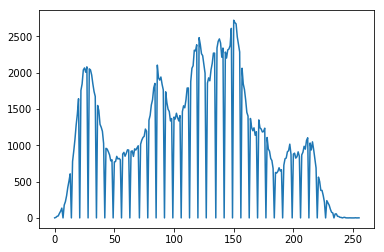

In [22]:
from skimage import exposure
exposure_bins, center_exposure = exposure.histogram(lena_float)
plt.plot(exposure_bins)

In [20]:
numpy_bins, numpy_centers = np.histogram(lena_float,256)

** Q.10 try to plot the histogram using `matplotlib.pyplot.hits` function**

([array([  67.,   67.,   87.,  178.,   16.,   26.,   71.,    0.,    0.,    0.]), array([  67.,   67.,   87.,  178.,   16.,   26.,   71.,    0.,    0.,    0.]), array([  63.,   69.,   81.,  188.,   20.,   20.,   70.,    1.,    0.,    0.]), array([  56.,   72.,   90.,  184.,   17.,   26.,   67.,    0.,    0.,    0.]), array([  56.,   71.,   87.,  190.,   13.,   27.,   68.,    0.,    0.,    0.]), array([  46.,   78.,   83.,  197.,   13.,   27.,   68.,    0.,    0.,    0.]), array([  46.,   75.,   88.,  192.,   15.,   33.,   63.,    0.,    0.,    0.]), array([  27.,   87.,   90.,  201.,   15.,   34.,   58.,    0.,    0.,    0.]), array([  21.,   77.,   96.,  206.,   18.,   26.,   68.,    0.,    0.,    0.]), array([  17.,   72.,  103.,  200.,   23.,   31.,   66.,    0.,    0.,    0.]), array([  13.,   65.,  101.,  204.,   24.,   46.,   59.,    0.,    0.,    0.]), array([  14.,   49.,  100.,  213.,   23.,   42.,   71.,    0.,    0.,    0.]), array([  12.,   53.,  100.,  201.,   28.,   51.,  

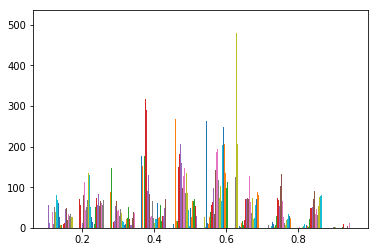

In [21]:
plt.hist(lena_float)